In [2]:
import numpy as np
import scipy.ndimage.filters as flt2
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.morphology as morph
%matplotlib inline

In [3]:
img=io.imread('/Users/data/P12098_nGI/evaluation/15s/DFI_e15s_17steps_1period_0000.tif')

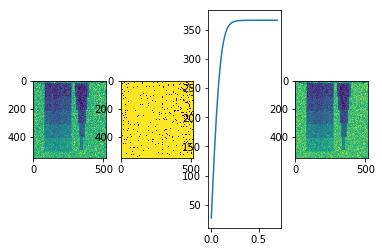

In [4]:
size=5
threshold=0.95
fimg=flt2.median_filter(img,size)
plt.subplot(1,4,1)
plt.imshow(img)
dimg=np.abs(img-fimg)

nbins=256

h,dx=np.histogram(dimg, bins=nbins, density=True)
ch=np.cumsum(h)
ch=ch/np.max(ch)
th=np.min(dx[np.where(ch>threshold)])
mask=dimg<th

plt.subplot(1,4,2)
plt.imshow(mask)
plt.subplot(1,4,3)

plt.plot(dx[0:nbins],np.cumsum(h))

cimg=mask*img+(1-mask)*fimg
plt.subplot(1,4,4)
plt.imshow(cimg)

In [9]:
whos

Variable   Type       Data/Info
-------------------------------
dimg       ndarray    551x520: 286520 elems, type `float32`, 1146080 bytes (1.092987060546875 Mb)
dx         ndarray    11: 11 elems, type `float64`, 88 bytes
fimg       ndarray    551x520: 286520 elems, type `float32`, 1146080 bytes (1.092987060546875 Mb)
flt2       module     <module 'scipy.ndimage.fi<...>cipy/ndimage/filters.py'>
h          ndarray    10: 10 elems, type `float64`, 80 bytes
img        ndarray    551x520: 286520 elems, type `float32`, 1146080 bytes (1.092987060546875 Mb)
io         module     <module 'skimage.io' from<...>/skimage/io/__init__.py'>
np         module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
size       int        5


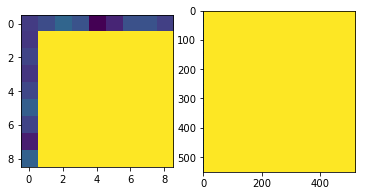

In [26]:
maximg=img.max()
img2=maximg-img
mask=img2
mask[2:550,2:519]=mask.max()
fh=morph.reconstruction(img2,mask,method='erosion')
plt.subplot(1,2,1)
plt.imshow(mask[1:10,1:10])
plt.subplot(1,2,2)
plt.imshow(fh)

In [24]:
import pymorph

ImportError: No module named 'pymorph'